# Modellierung dynamischer Systeme

### Beschreibung eines dynamischen Systems mit Hilfe von Differential Gleichungen

Ein dynamisches System lässt sich als Masse Feder System beschreiben.

Betrachten wir ein einfaches System bestehend aus einer Feder und einer Masse.

![FIG](images/spring-mass.png)


Wir wissen von diesem System, dass es sich elasstisch nach dem [Hookeschen Gesetz](https://de.wikipedia.org/wiki/Hookesches_Gesetz) verhält. Also die Ausdehnung der Feder ist direkt proportional (linear) zur angehängten Masse.


\begin{equation}
F = -k \cdot x
\end{equation}

Eine interessante Grösse für dieses System ist $x$ der Ort an welchem die Masse hängt.


Wir kennen auch das [2. Newtonsche Gestz](https://de.wikipedia.org/wiki/Newtonsche_Gesetze).

$$F_{tot} = m \cdot a$$



Die Beschleunigung $a$ lässt sich auch durch die zweite Ableitung des Ortes beschreiben.

also:

$$F_{tot} = m \cdot \ddot{x}$$

Auf das Feder-Masse System wirken zwei Kräfte

\begin{equation}
m \cdot \ddot{x} = -k \cdot x + m \cdot g 
\end{equation}

\begin{equation}
\ddot{x} = \frac{-kx}{m} + g
\end{equation}

Bei dieser Gleichung handelt es sich um eine Differntialgleichung 2. Ordnung

Mathematisch lässt sich eine Differentialgleichung manchmal lösen.

Mit einer Simulation kann das Verhalten des Systems numerisch modelliert werden.

Indem zu jedem Zeitpunkt die Beschleunigung und die Postion der Masse berechnet wird.

### Integration der Differentialgleichung

Die folgende Python Funktion berechnet die Position und Beschleunigung nach einem Zeitschritt.

In [2]:
def MassSpring(state,t):
  # unpack the state vector
  x = state[0]
  xd = state[1]

  # these are our constants
  k = 6.5 # Newtons per metre
  m = 3.5 # Kilograms
  g = 9.8 # metres per second
  b = 2.0 # damping

  # compute acceleration xdd
  xdd = ((-k*x)/m) + g 

  # return the two state derivatives
  return [xd, xdd]


Die Simulation funktioniert wie folgt:

1. Eine Anfangsgeschwindigkeit wird benötigt
2. Ein Zeitbereich für die Simulation

Die Simulation beginnt zum Zeitpunkt $t_0$

- Berechung der Beschleunigung $\ddot{x}$ aus Anfangszustand $x(t=0),\dot{x}(t=0)$
- Abschätzung der neuen Postion $x$ und Geschwindigkeit $dot{x}$ zur Zeit $0+\Delta t$
- Berechnung der Beschleunigung $\ddot{x}(0+\Delta t)$ aus $x(t=0+\Delta t),\dot{x}(t=0+\Delta t)$
- Abschätzung der neuen Position $x(t=0+2 \cdot \Delta t)$ und Geschwindigkeit $\dot{x}(t=0+2 \cdot \Delta t)$ 
- Berechnung der Beschleunigung $\ddot{x}(0+2 \cdot \Delta t)$
- usw.


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


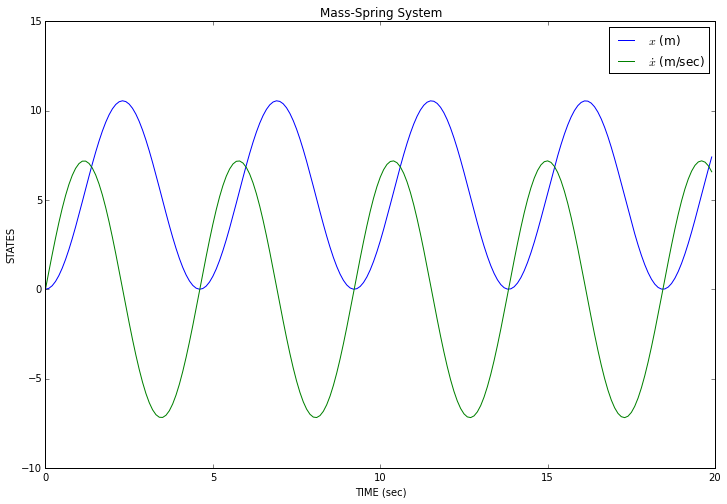

In [7]:
%pylab inline

from scipy.integrate import odeint

state0 = [0, 0.0]
t = arange(0.0, 20.0, 0.1)

state = odeint(MassSpring, state0, t)

fig = figure(figsize=(12,8))
plot(t, state)
xlabel('TIME (sec)')
ylabel('STATES')
title('Mass-Spring System')
legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))

## Mögliche Fragen

- Was bewirkt eine Veränderung der Federkonstante?
- Schwingt ein Federmasse System auf dem Mond langsamer oder schneller?
- Mit welcher Frequenz schwingt das System?
- In welche Richtung schaut die x-Achse?
- In der Natur unterliegen viele Systeme einer [Dämpfung](https://de.wikipedia.org/wiki/D%C3%A4mpfung). Ein solche Dämpfung kann eine Kraft erzeugen, welche proportional zur Geschwindigkeit ist. z.B. $F = -b \cdot \dot{x}$
- Wie sieht eine gdämpfte Bewegung aus?


# Lorenz System

Ein Lorenz system ist eine Vereinfachung atomsphärischer Konvektionsströmung. Das System beinhaltet 3 gekoppelte Differentialgleichungen. Die Zustandsvariable besteht aus $x,y,z$


\begin{eqnarray}
\dot{x} &= &\sigma(y-x)\\
\dot{y} &= &(\rho-z)x - y\\
\dot{z} &= &xy-\beta z
\end{eqnarray}

Die drei Parameter $\sigma,\rho,\beta$ characterizieren das
chaotische Verhalten.

Wählen wir diese wie folgt:

\begin{eqnarray}
\sigma &= &10\\
\rho &= &28\\
\beta &= &\frac{8}{3}
\end{eqnarray}


Analog zum Masse System können mit Hilfe einer Simualtion einzelne Zeitschritte berechnet werden.

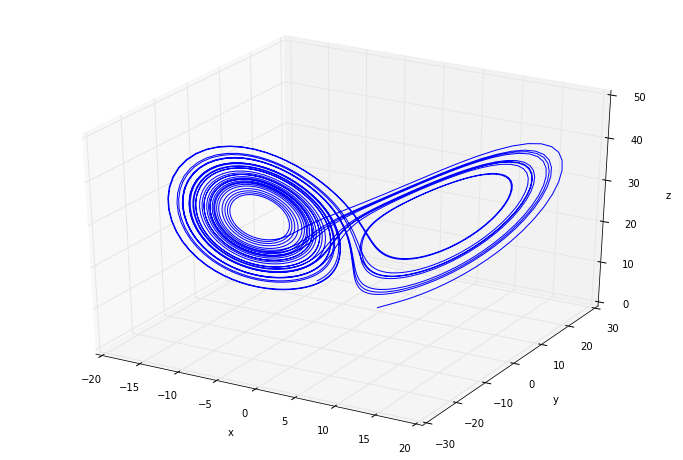

In [23]:
from scipy.integrate import odeint

def Lorenz(state,t):
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # these are our constants
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (rho-z)*x - y
  zd = x*y - beta*z

  # return the state derivatives
  return [xd, yd, zd]

state0 = [2.3, 3.0, 4.0]
t = arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
show()

### Was geschieht mit anderen Parametern

- z.B. andere Startwerte?

distance = 15.790459 for a 0.000100 different in initial condition


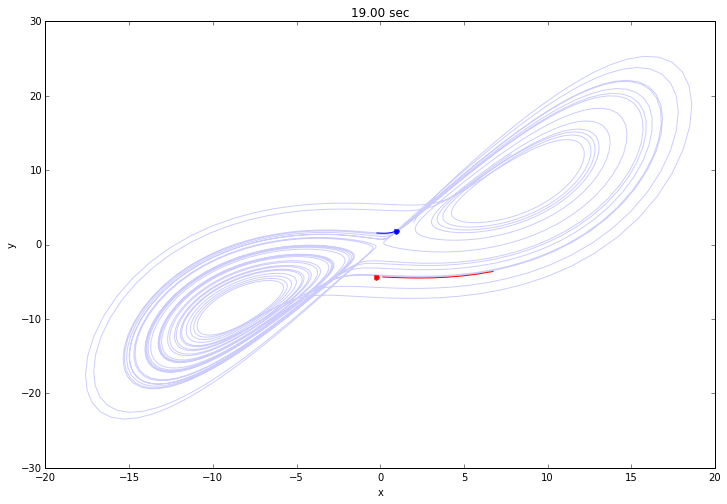

In [22]:
t = arange(0.0, 30, 0.01)

# original initial conditions
state1_0 = [2.0, 3.0, 4.0]
state1 = odeint(Lorenz, state1_0, t)

# rerun with very small change in initial conditions
delta = 0.0001
state2_0 = [2.0+delta, 3.0, 4.0]
state2 = odeint(Lorenz, state2_0, t)

# animation
figure(figsize=(12,8))
pb = plot(state1[:,0],state1[:,1],'b-',alpha=0.2)
xlabel('x')
ylabel('y')

i = 1900          # the two simulations really diverge here!

p = plot(state1[i:i+10,0],state1[i:i+10,1],'b-')
pp = plot(state1[i+10,0],state1[i+10,1],'b.',markersize=10)
p2 = plot(state2[i:i+10,0],state2[i:i+10,1],'r-')
pp2 = plot(state2[i+10,0],state2[i+10,1],'r.',markersize=10)
tt = title("%4.2f sec" % (1.0*i/100))

s1 = state1[i,:]
s2 = state2[i,:]
d12 = norm(s1-s2) # distance
print ("distance = %f for a %f different in initial condition") % (d12, delta)

Nach wievielen Zeitschritten gehen die Simulationen auseinander, wenn fast identische Startbedingugnen gewählt werden?